In [18]:
import scipy.stats as stats

# Given data
sample_mean = 20.42
population_mean = 21.50
sample_std = 2.7
sample_size = 45

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))

# Degrees of freedom
df = sample_size - 1

# Calculate the critical value for a one-tailed test at alpha = 0.01
critical_value = stats.t.ppf(0.01, df)

# Calculate the p-value
p_value = stats.t.cdf(t_statistic, df)

t_statistic, critical_value, p_value

(-2.6832815729997432, -2.414134368168738, 0.005116690057537228)

In [19]:
import scipy.stats as stats

# Data
m1 = [8, 9, 11, 12]
m2 = [6, 8, 10, 4]
m3 = [14, 12, 18, 9]
m4 = [20, 22, 25, 23]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(m1, m2, m3, m4)

f_statistic, p_value

(25.221574344023324, 1.8124793267561276e-05)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('bike_sharing.csv')

# Display the first few rows of the dataset
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
# Checking the structure of the dataset
data.info()

# Statistical summary of the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Here are some observations:

	•	The dataset contains 10,886 entries and 12 columns.
	•	The columns are: datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed,  casual, registered, and count.
	•	The datetime column is of object type and should be converted to datetime type for analysis.
	•	There are no missing values in the dataset.
	•	temp, atemp, humidity, and windspeed are continuous variables.
	•	season, holiday, workingday, and weather are categorical variables.
	•	The dependent variable is count.

In [3]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Univariate Analysis

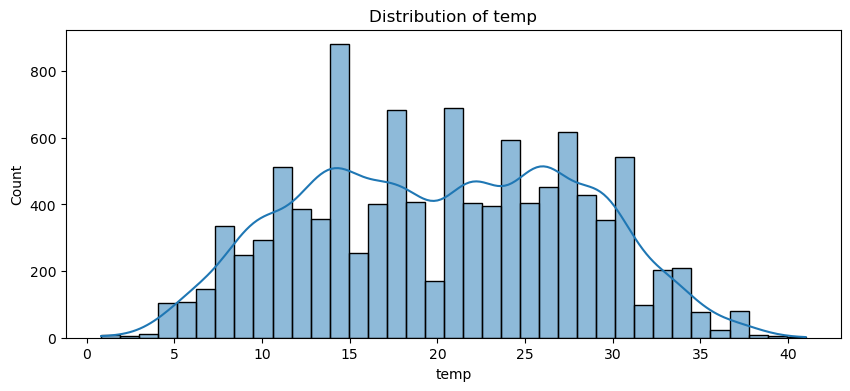

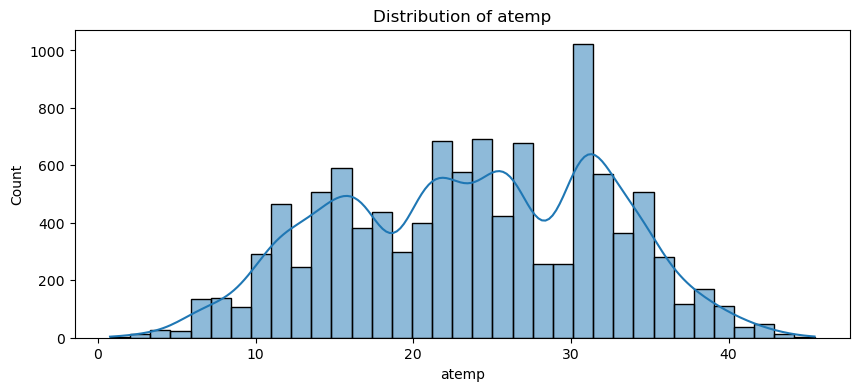

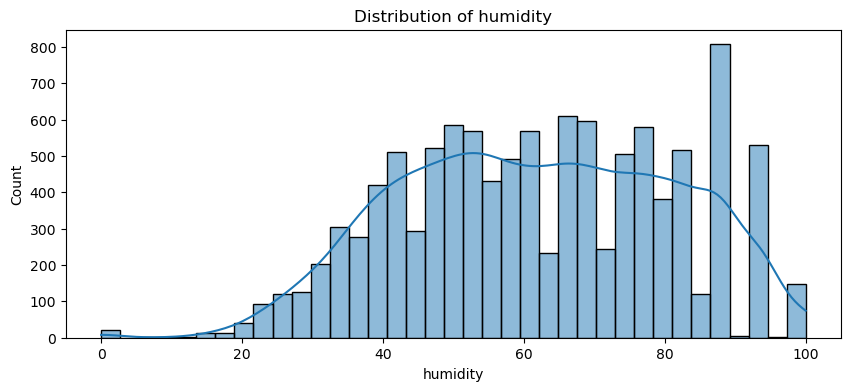

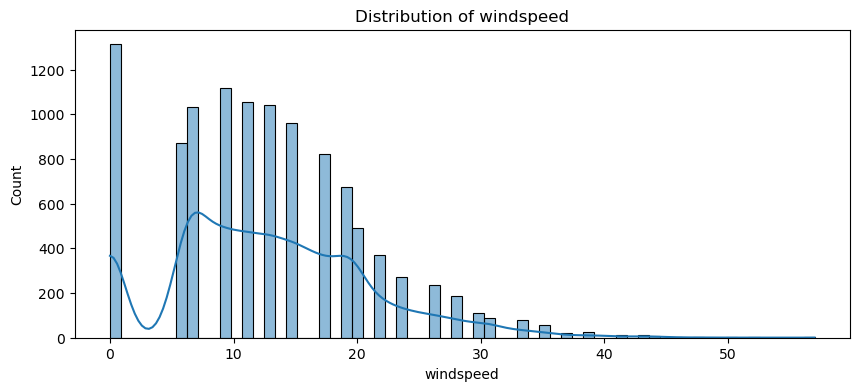

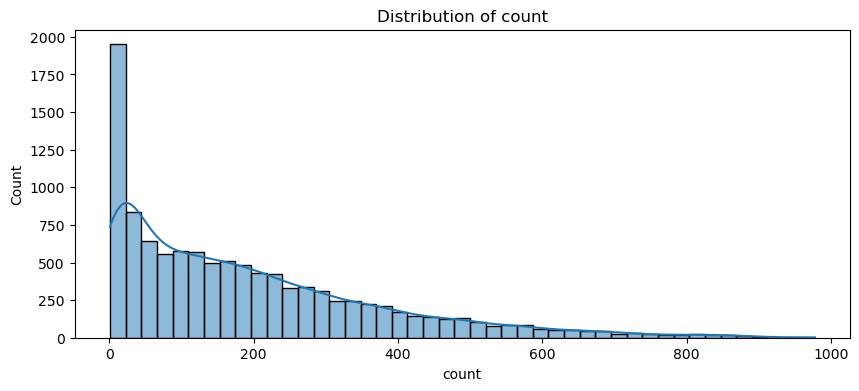

In [10]:
# Convert datetime column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Distribution of continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
for var in continuous_vars:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

### temp and atemp variables are almost normally distributed while (count and wind) are right skewed and humidity is somewhat right skewed.

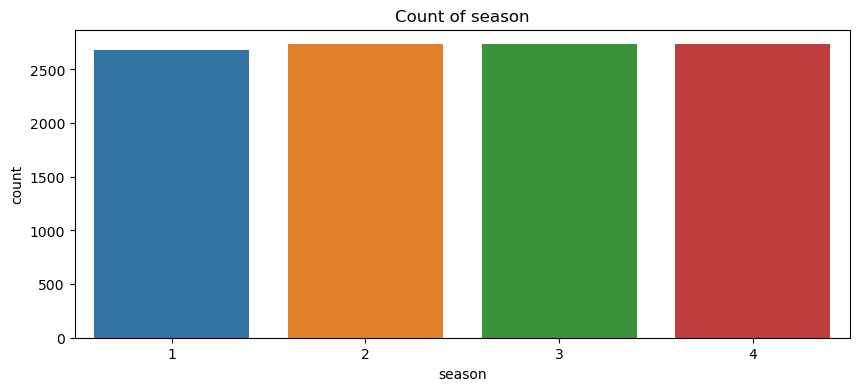

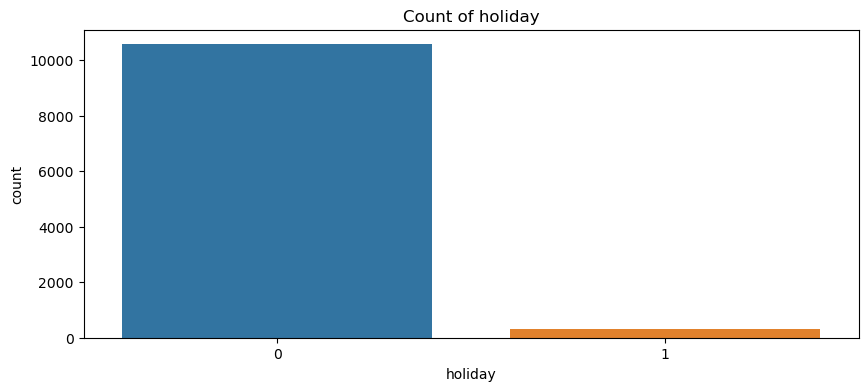

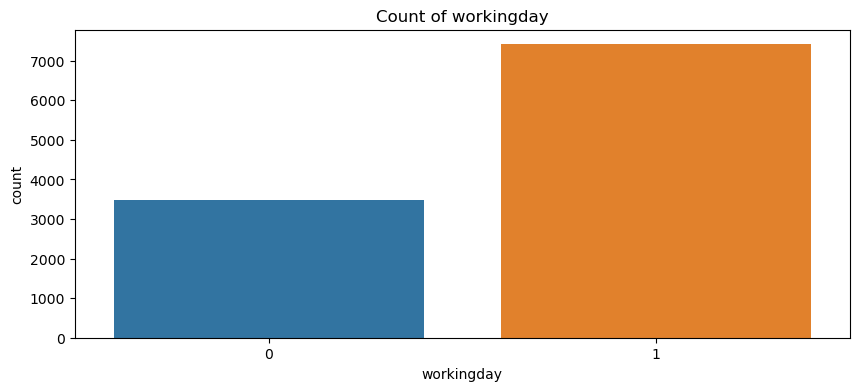

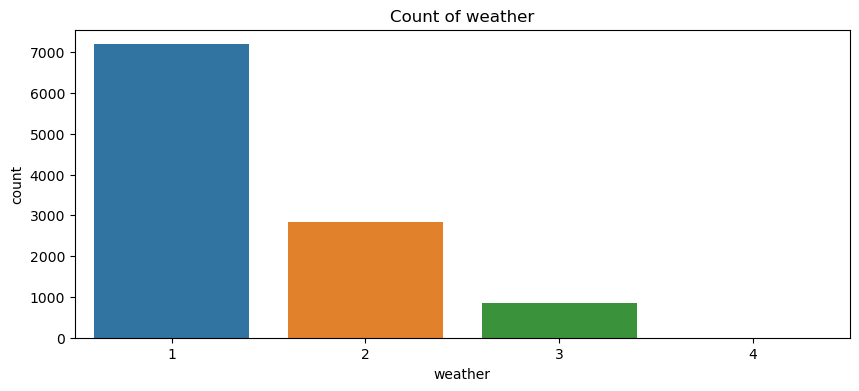

In [11]:
# Count plots for categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=var, data=data)
    plt.title(f'Count of {var}')
    plt.show()

### no count in winter season and max count in spring season when the temperatures are neither too hot neither too cold.
### count is almost half on weekend or holidays.
### also, it is very less used on government declared holidays, maybe its used for day to day travels to office or shops, etc.

## Bivariate Analysis

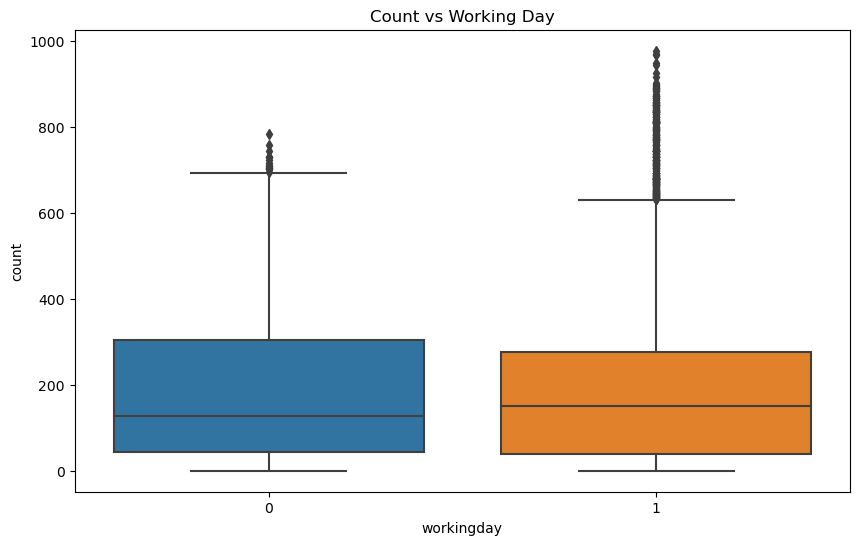

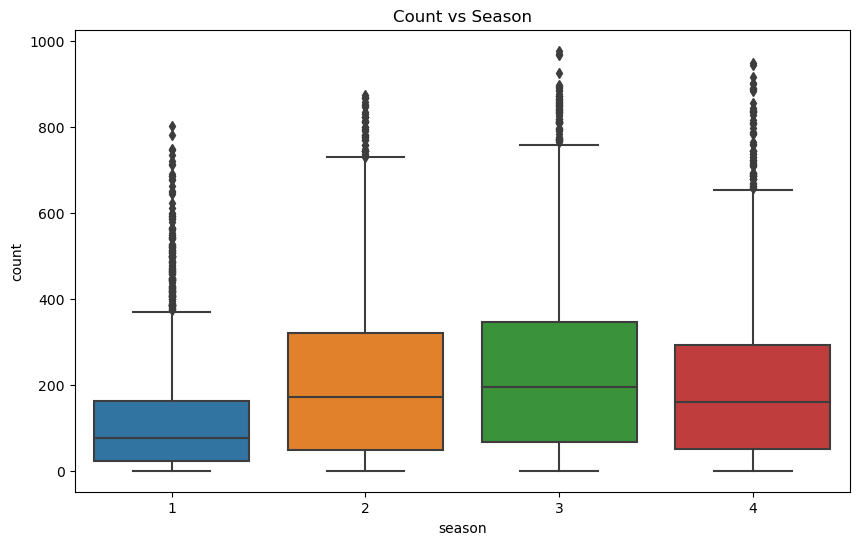

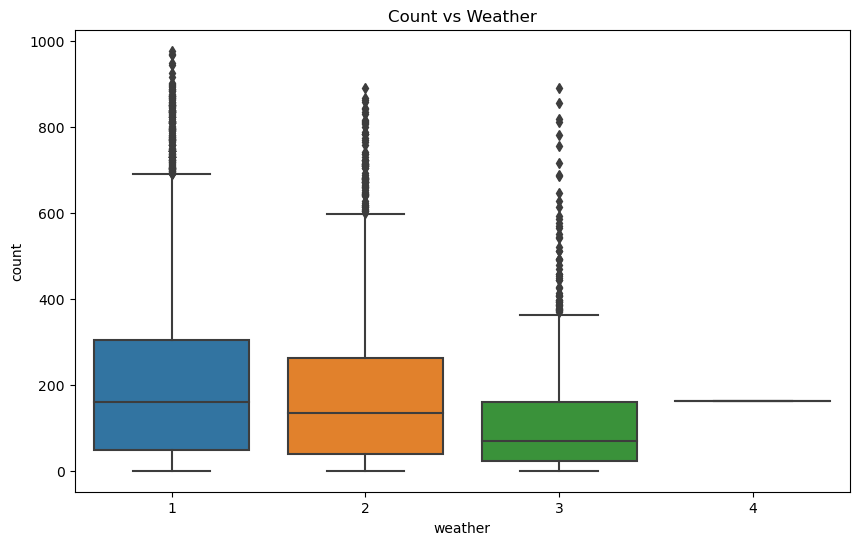

In [12]:
# Relationship between workingday and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count', data=data)
plt.title('Count vs Working Day')
plt.show()

# Relationship between season and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=data)
plt.title('Count vs Season')
plt.show()

# Relationship between weather and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=data)
plt.title('Count vs Weather')
plt.show()

## Hypothesis Testing

### based on above observations we can perform hypothesis testing for :
    1. working days and non-working days
    2. seasons
    3. weathers
    4. season and weather

### 2-Sample T-Test: Effect of Working Day on Number of Electric Cycles Rented

Null Hypothesis (H0): There is no significant difference in the number of cycles rented on working days and non-working days.

Alternate Hypothesis (H1): There is a significant difference in the number of cycles rented on working days and non-working days.

In [6]:
# Separate data into working days and non-working days
workingday_data = data[data['workingday'] == 1]['count']
non_workingday_data = data[data['workingday'] == 0]['count']

# Perform 2-sample t-test
t_stat, p_value = stats.ttest_ind(workingday_data, non_workingday_data)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 1.2096277376026694, P-value: 0.22644804226361348


In [ ]:
# Separate data into working days and non-working days
workingday_data = data[data['workingday'] == 1]['count']
non_workingday_data = data[data['workingday'] == 0]['count']

# Perform 2-sample t-test
t_stat, p_value = stats.ttest_ind(workingday_data, non_workingday_data)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

### ANOVA: Number of Cycles Rented in Different Seasons and Weathers

For Seasons:

Null Hypothesis (H0): The mean number of cycles rented is the same across all seasons.

Alternate Hypothesis (H1): The mean number of cycles rented is different for at least one season.

In [7]:
# Perform ANOVA for seasons
anova_season = ols('count ~ C(season)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_season, typ=2)
print(anova_table)

                 sum_sq       df           F         PR(>F)
C(season)  2.190083e+07      3.0  236.946711  6.164843e-149
Residual   3.352721e+08  10882.0         NaN            NaN


For Weathers:

Null Hypothesis (H0): The mean number of cycles rented is the same across all weathers.

Alternate Hypothesis (H1): The mean number of cycles rented is different for at least one weather type.

In [8]:
# Perform ANOVA for weathers
anova_weather = ols('count ~ C(weather)', data=data).fit()
anova_table_weather = sm.stats.anova_lm(anova_weather, typ=2)
print(anova_table_weather)

                  sum_sq       df          F        PR(>F)
C(weather)  6.338070e+06      3.0  65.530241  5.482069e-42
Residual    3.508348e+08  10882.0        NaN           NaN


For holiday:

Null Hypothesis (H0): The mean number of cycles rented is the same across all days.

Alternate Hypothesis (H1): The mean number of cycles rented is different on holidays.

In [14]:
# Perform ANOVA for holiday
anova_holiday = ols('count ~ C(holiday)', data=data).fit()
anova_table_holiday = sm.stats.anova_lm(anova_holiday, typ=2)
print(anova_table_holiday)

                  sum_sq       df         F    PR(>F)
C(holiday)  1.038812e+04      1.0  0.316563  0.573692
Residual    3.571625e+08  10884.0       NaN       NaN


For workingday:

Null Hypothesis (H0): The mean number of cycles rented is the same across all days.

Alternate Hypothesis (H1): The mean number of cycles rented is different on non workingday.

In [17]:
# Perform ANOVA for workingday
anova_workingday = ols('count ~ C(workingday)', data=data).fit()
anova_table_workingday = sm.stats.anova_lm(anova_workingday, typ=2)
print(anova_table_workingday)

                     sum_sq       df         F    PR(>F)
C(workingday)  4.801037e+04      1.0  1.463199  0.226448
Residual       3.571249e+08  10884.0       NaN       NaN


### Chi-Square Test: Dependency of Weather on Season

Null Hypothesis (H0): Weather is independent of the season.

Alternate Hypothesis (H1): Weather is dependent on the season. 

In [9]:
# Create a contingency table
contingency_table = pd.crosstab(data['season'], data['weather'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2_stat}, P-value: {p_val}')

Chi-square statistic: 49.158655596893624, P-value: 1.549925073686492e-07


## Interpretation of Results

### Based on the p-values obtained from the hypothesis tests, we can make the following decisions:

### 1.	2-Sample T-Test (Working Day Effect): p-value ≥ 0.05, we fail to reject the null hypothesis, hence there is no significant difference in the number of cycles rented on working days and non-working days.
    
### 2a.	ANOVA (Season Effects): p-value < 0.05 hence, we reject the null hypothesis and conclude that the mean number of cycles rented differs across different seasons types.
    
### 2b.	ANOVA (Weather Effects): p-value < 0.05 hence, we reject the null hypothesis and conclude that the mean number of cycles rented differs across different weather types.

### 2b.	ANOVA (holiday): p-value > 0.05 hence, we reject the null hypothesis and conclude that the mean number of cycles rented differs across holiday and non holidays.

### 2b.	ANOVA (workingday): p-value > 0.05 hence, we reject the null hypothesis and conclude that the mean number of cycles rented differs across working and non working days.
    
### 3.	Chi-Square Test (Dependency of Weather on Season): p-value < 0.05, we reject the null hypothesis and conclude that weather is dependent on the season.

# Conclusion

### This analysis provides insights into the factors affecting the demand for Yulu electric cycles, helping the company understand the impact of working days, seasons, and weather on rentals. Based on the results, Yulu can tailor its strategies to optimize operations and enhance customer satisfaction.